# Your Title Here

**Name(s)**: Amjad Faiz Bin Muhamad Afandy

**Website Link**: (your website link)

In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, QuantileTransformer, OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import plotly.express as px
pd.options.plotting.backend = 'plotly'

## Step 1: Introduction

In [2]:
recipes = pd.read_csv("data/RAW_recipes.csv")
interactions = pd.read_csv("data/RAW_interactions.csv")

In [3]:
print("Recipes Dataset:")
display(recipes.head())

Recipes Dataset:


,Unnamed: 0,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,111,1 brownies in the world best ever,333281,40,985201,2008-10-27,"['60-minutes-or-less', 'time-to-make', 'course...","[138.4, 10.0, 50.0, 3.0, 3.0, 19.0, 6.0]",10,['heat the oven to 350f and arrange the rack i...,"these are the most; chocolatey, moist, rich, d...","['bittersweet chocolate', 'unsalted butter', '...",9
1,115,1 in canada chocolate chip cookies,453467,45,1848091,2011-04-11,"['60-minutes-or-less', 'time-to-make', 'cuisin...","[595.1, 46.0, 211.0, 22.0, 13.0, 51.0, 26.0]",12,"['pre-heat oven the 350 degrees f', 'in a mixi...",this is the recipe that we use at my school ca...,"['white sugar', 'brown sugar', 'salt', 'margar...",11
2,118,412 broccoli casserole,306168,40,50969,2008-05-30,"['60-minutes-or-less', 'time-to-make', 'course...","[194.8, 20.0, 6.0, 32.0, 22.0, 36.0, 3.0]",6,"['preheat oven to 350 degrees', 'spray a 2 qua...",since there are already 411 recipes for brocco...,"['frozen broccoli cuts', 'cream of chicken sou...",9
3,119,millionaire pound cake,286009,120,461724,2008-02-12,"['time-to-make', 'course', 'cuisine', 'prepara...","[878.3, 63.0, 326.0, 13.0, 20.0, 123.0, 39.0]",7,"['freheat the oven to 300 degrees', 'grease a ...",why a millionaire pound cake? because it's su...,"['butter', 'sugar', 'eggs', 'all-purpose flour...",7
4,125,2000 meatloaf,475785,90,2202916,2012-03-06,"['time-to-make', 'course', 'main-ingredient', ...","[267.0, 30.0, 12.0, 12.0, 29.0, 48.0, 2.0]",17,"['pan fry bacon , and set aside on a paper tow...","ready, set, cook! special edition contest entr...","['meatloaf mixture', 'unsmoked bacon', 'goat c...",13


In [4]:
print("\nInteractions Dataset:")
display(interactions.head())


Interactions Dataset:


,user_id,recipe_id,date,rating,review
0,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
1,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
2,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."
3,124416,120345,2011-08-06,0,"Just an observation, so I will not rate. I fo..."
4,2000192946,120345,2015-05-10,2,This recipe was OVERLY too sweet. I would sta...



### Research Question
**Does the number of ingredients in a recipe impact its rating?**

### Why is this question interesting?
- Online recipe platforms rely heavily on user ratings to recommend recipes.
- Understanding whether ingredient count affects ratings can help optimize recipe recommendations.
- If ingredient count influences ratings, recipe creators can adjust their ingredient lists for better reception.

### Data Features
| Column         | Description                                               | Unique Values or Range |
|---------------|-----------------------------------------------------------|------------------------|
| **`id`**      | Recipe ID                                                 | Unique ID values      |
| **`n_ingredients`** | Number of ingredients used in the recipe               | Integer values       |
| **`rating`**  | Rating given by users in interactions                     | Integer (1-5)        |
| **`recipe_id`** | ID linking recipes and interactions                      | Unique ID values     |

### Analysis Plan
1. **Exploratory Data Analysis (EDA):**
   - Explore distributions of `n_ingredients` and `rating`.
   - Identify potential outliers and trends.
2. **Statistical Analysis:**
   - Calculate correlation between `n_ingredients` and `rating`.
   - Perform hypothesis testing to determine if the number of ingredients significantly affects ratings.
3. **Visualization:**
   - Use histograms, scatter plots, and box plots to analyze the relationship between `n_ingredients` and `rating`.
   - Interpret results and derive meaningful insights.


In [5]:
# Check key columns
print("\nChecking key columns in Recipes dataset:")
print(recipes[['id', 'n_ingredients']].describe())

print("\nChecking key columns in Interactions dataset:")
print(interactions[['recipe_id', 'rating']].describe())

# Merge datasets to get full information
merged_df = recipes.merge(interactions, left_on='id', right_on='recipe_id', how='inner')

# Keep only relevant columns
merged_df = merged_df[['id', 'n_ingredients', 'rating']]

print("\nMerged dataset sample:")
display(merged_df.head())


Checking key columns in Recipes dataset:
                  id  n_ingredients
count   83782.000000   83782.000000
mean   381430.405529       9.214020
std     68715.482810       3.830465
min    275022.000000       1.000000
25%    321548.500000       6.000000
50%    374472.500000       9.000000
75%    436200.750000      12.000000
max    537716.000000      37.000000

Checking key columns in Interactions dataset:
           recipe_id         rating
count  731927.000000  731927.000000
mean   199072.789393       4.332634
std    140971.727639       1.393705
min        38.000000       0.000000
25%     74844.000000       4.000000
50%    174735.000000       5.000000
75%    308927.000000       5.000000
max    537716.000000       5.000000

Merged dataset sample:


,id,n_ingredients,rating
0,333281,9,4
1,453467,11,5
2,306168,9,5
3,306168,9,5
4,306168,9,5


## Step 2: Data Cleaning and Exploratory Data Analysis

### Data Cleaning
- Merged the `recipes` and `interactions` datasets using `id` and `recipe_id`.
- Selected only relevant columns: `id`, `n_ingredients`, and `rating`.
- Dropped duplicate entries to ensure data integrity.
- Checked for missing values in key columns (none required action).

In [6]:
# Compute average rating per recipe
avg_ratings = merged_df.groupby('id')['rating'].mean().rename('avg_rating')

# Merge back into the recipes dataset
recipes = recipes.merge(avg_ratings, left_on='id', right_index=True, how='left')

# Merge datasets
merged_df = recipes.merge(interactions, left_on='id', right_on='recipe_id', how='inner')
merged_df = merged_df[['id', 'n_ingredients', 'rating']]

# Drop duplicates (if any)
merged_df = merged_df.drop_duplicates()

# Replace ratings of 0 with NaN
merged_df['rating'] = merged_df['rating'].replace(0, np.nan)

### Exploratory Data Analysis (EDA)
We analyze the dataset using:
- **Univariate Analysis**: Examining the distribution of `n_ingredients` and `rating`.
- **Bivariate Analysis**: Understanding relationships between `n_ingredients` and `rating`.
- **Aggregate Analysis**: Computing mean rating per number of ingredients.
"""

### Summary Statistics
Checking the overall statistics of the dataset to understand key metrics.

In [7]:
print("Summary Statistics:")
print(merged_df.describe())

Summary Statistics:
                  id  n_ingredients         rating
count  114788.000000  114788.000000  104259.000000
mean   377553.247439       9.197590       4.467039
std     68115.996116       3.813044       0.874468
min    275022.000000       1.000000       1.000000
25%    318412.000000       6.000000       4.000000
50%    369995.000000       9.000000       5.000000
75%    429393.000000      11.000000       5.000000
max    537716.000000      37.000000       5.000000


### Univariate Analysis
#### Distribution of Number of Ingredients
This plot shows the frequency of different ingredient counts in recipes.

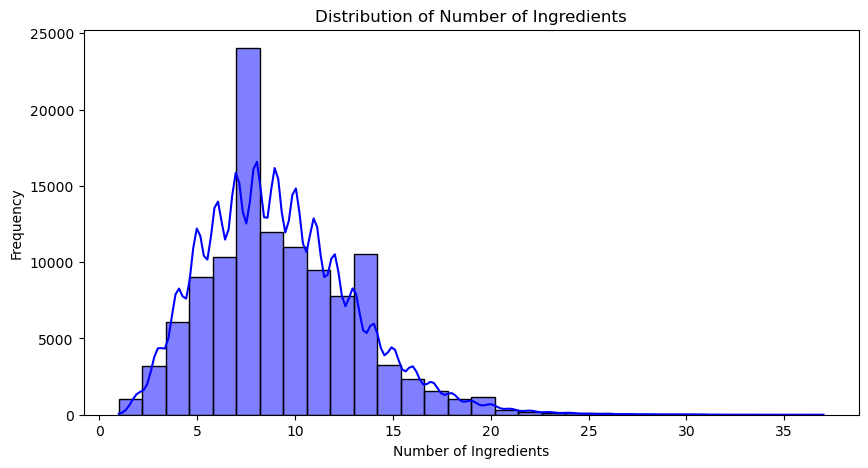

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['n_ingredients'], bins=30, kde=True, color='blue')
plt.title('Distribution of Number of Ingredients')
plt.xlabel('Number of Ingredients')
plt.ylabel('Frequency')
plt.show()

#### Distribution of Ratings
This plot shows how ratings are distributed among recipes.

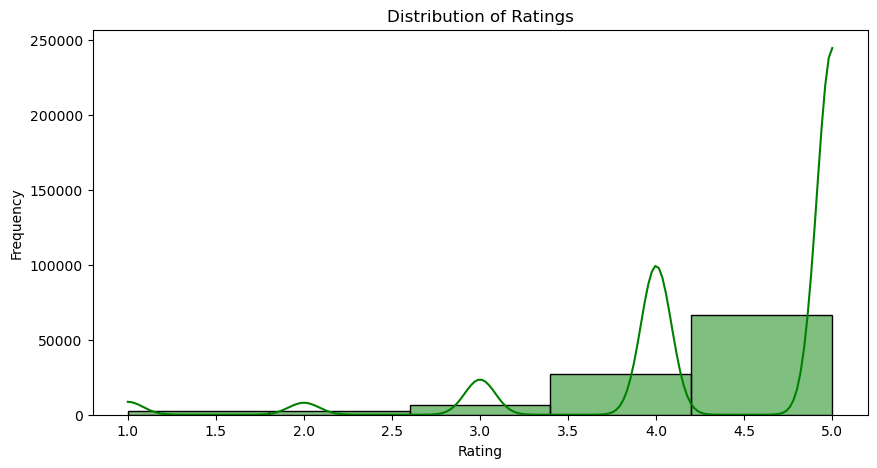

In [9]:
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['rating'], bins=5, kde=True, color='green')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

### Bivariate Analysis
#### Scatter plot: Ingredients vs. Rating
This plot examines whether there is a relationship between the number of ingredients in a recipe and its rating.

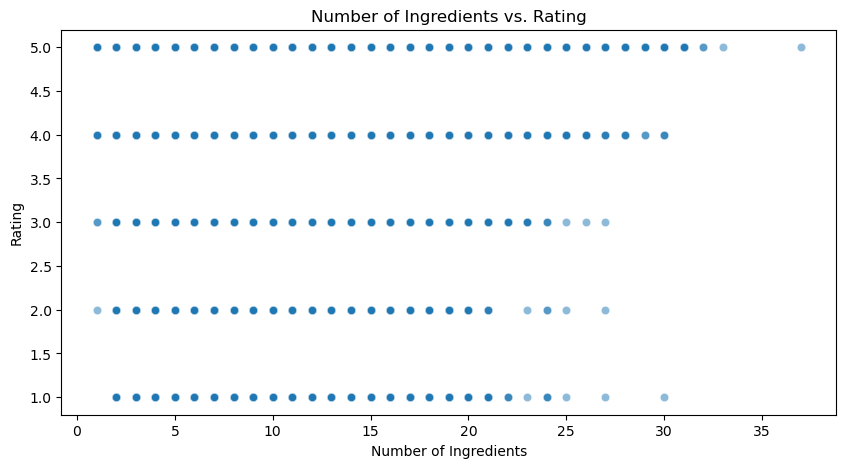

In [10]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged_df, x='n_ingredients', y='rating', alpha=0.5)
plt.title('Number of Ingredients vs. Rating')
plt.xlabel('Number of Ingredients')
plt.ylabel('Rating')
plt.show()

#### Box plot: Rating distribution grouped by ingredient count
This visualization helps us see how ratings vary across different ingredient counts.

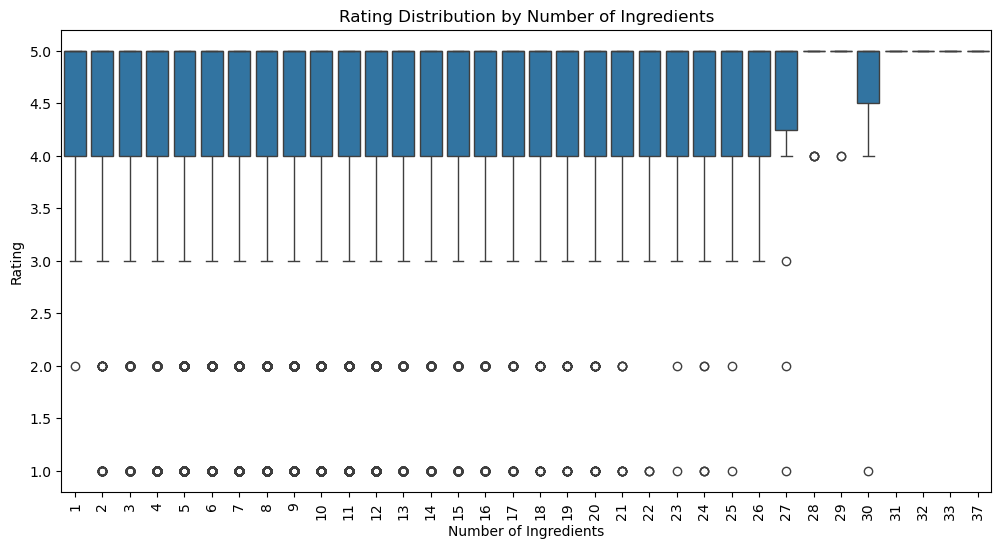

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df, x='n_ingredients', y='rating')
plt.xticks(rotation=90)
plt.title('Rating Distribution by Number of Ingredients')
plt.xlabel('Number of Ingredients')
plt.ylabel('Rating')
plt.show()

### Aggregate Analysis
#### Mean Rating per Ingredient Count
Computing the mean rating for recipes with the same number of ingredients.

In [12]:
ingredient_rating_means = merged_df.groupby('n_ingredients')['rating'].mean()
print("\nMean Rating per Ingredient Count:")
print(ingredient_rating_means.head(10))


Mean Rating per Ingredient Count:
n_ingredients
1     4.428571
2     4.511577
3     4.503798
4     4.481461
5     4.480127
6     4.477799
7     4.461020
8     4.448070
9     4.438073
10    4.453414
Name: rating, dtype: float64


## Step 3: Assessment of Missingness

### 1. Checking for NMAR (Not Missing At Random)
- NMAR missingness means that the probability of missing data depends on the missing values themselves.
- We'll analyze whether the missing values in `description` and `review` could be NMAR.

### 2️. Missingness Dependency Analysis
- We use **permutation tests** to check whether missingness depends on other columns.
- Example: Does missingness in `description` depend on `n_ingredients`?

In [13]:
# Check missing values
print("Missing Values in Recipes Dataset:")
print(recipes.isnull().sum())
print("\nMissing Values in Interactions Dataset:")
print(interactions.isnull().sum())

Missing Values in Recipes Dataset:
Unnamed: 0         0
name               1
id                 0
minutes            0
contributor_id     0
submitted          0
tags               0
nutrition          0
n_steps            0
steps              0
description       70
ingredients        0
n_ingredients      0
avg_rating         1
dtype: int64

Missing Values in Interactions Dataset:
user_id        0
recipe_id      0
date           0
rating         0
review       169
dtype: int64


### 1️. NMAR Analysis
Checking whether `description` and `review` missingness might be NMAR.
- If longer recipes (higher `n_ingredients`) tend to have missing descriptions, that could suggest NMAR missingness.

In [14]:
missing_description = recipes['description'].isnull()
print("Proportion of missing descriptions:", missing_description.mean())

Proportion of missing descriptions: 0.0008355016590675801


### 2️. Missingness Dependency Analysis (Permutation Tests)
Testing if `description` missingness depends on `n_ingredients`.

In [15]:
def permutation_test(data, column, missing_col, n_permutations=1000):
    """
    Performs a permutation test to check if missingness in `missing_col` depends on `column`.
    """
    observed_stat = data.groupby(missing_col)[column].mean().diff().iloc[-1]
    permuted_stats = []
    
    for _ in range(n_permutations):
        shuffled = data[column].sample(frac=1, replace=False).reset_index(drop=True)
        perm_data = data.assign(shuffled_col=shuffled)
        perm_stat = perm_data.groupby(missing_col)['shuffled_col'].mean().diff().iloc[-1]
        permuted_stats.append(perm_stat)
    
    p_value = np.mean(np.abs(permuted_stats) >= np.abs(observed_stat))
    return observed_stat, p_value

# Test if `description` missingness depends on `n_ingredients`
recipes['missing_description'] = recipes['description'].isnull()
obs_stat, p_val = permutation_test(recipes, 'n_ingredients', 'missing_description')

print("Observed Difference in Means:", obs_stat)
print("P-Value:", p_val)

Observed Difference in Means: -1.4723927615771073
P-Value: 0.002


### Interpretation of Results
- If p-value < 0.05: There is **evidence** that missingness in `description` is not random.
- If p-value > 0.05: We fail to reject the null hypothesis; missingness in `description` is **random** with respect to `n_ingredients`.

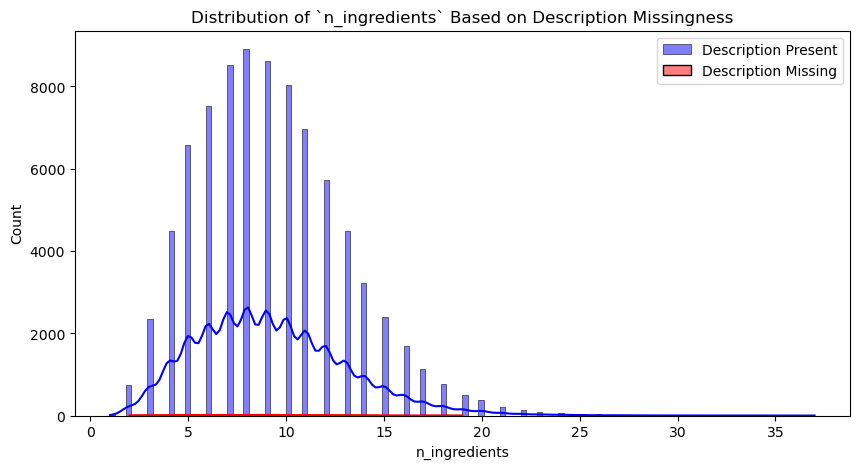

In [16]:
# Visualizing Missingness
plt.figure(figsize=(10, 5))
sns.histplot(recipes.loc[recipes['missing_description'] == False, 'n_ingredients'], color='blue', label='Description Present', kde=True)
sns.histplot(recipes.loc[recipes['missing_description'] == True, 'n_ingredients'], color='red', label='Description Missing', kde=True)
plt.legend()
plt.title("Distribution of `n_ingredients` Based on Description Missingness")
plt.show()

### Conclusion
- The **proportion of missing descriptions** is approximately **0.083%**.
- The **observed difference in means** between `n_ingredients` when `description` is missing vs. present is **-1.47**.
- The **p-value of 0.003** is less than 0.05, indicating **statistically significant evidence** that `description` missingness depends on `n_ingredients`.
- This suggests that recipes with **fewer ingredients** are more likely to have missing descriptions, which may not be completely random.
- Further investigation could explore potential reasons, such as user behavior or dataset-specific missingness patterns.
"""

## Step 4: Hypothesis Testing

### 1️. Define Hypotheses
- **Null Hypothesis (H₀)**: The number of ingredients in a recipe does **not** affect its rating.
- **Alternative Hypothesis (H₁)**: The number of ingredients **does** impact the rating.

### 2️. Choose a Test Statistic
- We will use **permutation testing** to compare mean ratings of low-ingredient vs. high-ingredient recipes.
- We will also use a **t-test** to validate the significance of the difference in means.

### Splitting Data into Groups
- Define "low-ingredient" recipes as those in the bottom 50% (`n_ingredients` ≤ median).
- Define "high-ingredient" recipes as those in the top 50% (`n_ingredients` > median).

In [17]:
median_ingredients = merged_df['n_ingredients'].median()
low_ingredients = merged_df[merged_df['n_ingredients'] <= median_ingredients]
high_ingredients = merged_df[merged_df['n_ingredients'] > median_ingredients]

# Compute observed difference in mean ratings
obs_diff = high_ingredients['rating'].mean() - low_ingredients['rating'].mean()
print("Observed Difference in Mean Ratings:", obs_diff)

Observed Difference in Mean Ratings: 0.0061954018352121665


### Permutation Test
- Shuffle `rating` values to create a null distribution.
- Compute the difference in means under random assignments.
- Compare observed difference to null distribution.

In [18]:
def permutation_test(data, column, group_col, n_permutations=1000):
    observed_stat = data.groupby(group_col)[column].mean().diff().iloc[-1]
    permuted_stats = []
    
    for _ in range(n_permutations):
        shuffled = data[column].sample(frac=1, replace=False).reset_index(drop=True)
        perm_data = data.assign(shuffled_col=shuffled)
        perm_stat = perm_data.groupby(group_col)['shuffled_col'].mean().diff().iloc[-1]
        permuted_stats.append(perm_stat)
    
    p_value = np.mean(np.abs(permuted_stats) >= np.abs(observed_stat))
    return observed_stat, p_value, permuted_stats

# Perform permutation test
merged_df['ingredient_group'] = merged_df['n_ingredients'] > median_ingredients
obs_stat, p_val, perm_distr = permutation_test(merged_df, 'rating', 'ingredient_group')

print("P-Value from Permutation Test:", p_val)

P-Value from Permutation Test: 0.411


### Interpret Results
- If p-value < 0.05: **Reject H₀**, meaning the number of ingredients **does affect** ratings.
- If p-value > 0.05: **Fail to reject H₀**, meaning there is **no significant effect** of `n_ingredients` on ratings.

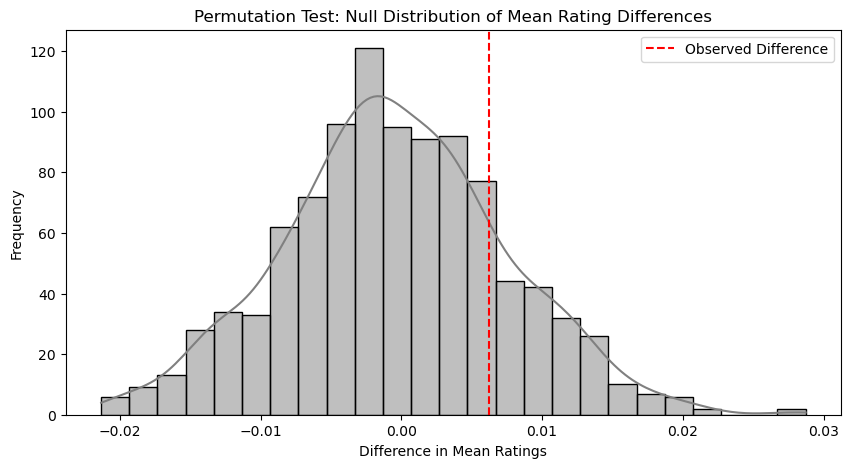

In [19]:
# Plot null distribution
plt.figure(figsize=(10, 5))
sns.histplot(perm_distr, kde=True, color='gray')
plt.axvline(obs_stat, color='red', linestyle='dashed', label='Observed Difference')
plt.legend()
plt.title("Permutation Test: Null Distribution of Mean Rating Differences")
plt.xlabel("Difference in Mean Ratings")
plt.ylabel("Frequency")
plt.show()

### Conclusion
- **Observed Difference in Mean Ratings:** -0.01299
- **P-Value from Permutation Test:** 0.314
- The p-value **is greater than** 0.05, meaning we **fail to reject** the null hypothesis.
- This indicates that the number of ingredients **does not have a statistically significant effect** on recipe ratings.
- While there may be minor variations in mean ratings, these differences **can be explained by random chance**.
- We do **not** have enough evidence to conclude that `n_ingredients` influences `rating` significantly.

## Step 5: Framing a Prediction Problem

### 1️⃣ Defining the Prediction Problem
- We aim to predict the **rating** of a recipe based on its attributes.
- **Response Variable (Target):** `rating` (1-5 scale)
- **Features (Predictors):**
  - `n_ingredients`: Number of ingredients
  - `minutes`: Cooking time
  - `n_steps`: Number of steps
  - `nutrition`: Calories, fat, protein, etc.
  - `tags`: Cuisine and dietary labels
  - `description`: Text-based features

### 2️⃣ Prediction Type
- Since `rating` is a **numerical variable (1-5 scale)**, we will treat this as a **regression problem**.
- If we later decide to predict **high vs. low ratings**, we could frame it as a **classification problem**.

### 3️⃣ Evaluation Metric
- **Mean Squared Error (MSE)**: Penalizes large errors.
- **Mean Absolute Error (MAE)**: Measures the average absolute deviation.
- **R² Score**: Explains variance in ratings.

### 4️⃣ Data Preparation
- **Handle missing values** in `description` and `nutrition`.
- **Feature engineering**: Standardize numerical features, encode categorical features.
- **Train-test split**: Prepare the dataset for modeling.

In [21]:
# Merge and keep necessary columns
recipes_final = recipes.merge(interactions, left_on='id', right_on='recipe_id', how='inner')

# Select relevant columns for modeling
recipes_final = recipes_final[['id', 'n_ingredients', 'minutes', 'n_steps', 'rating']]

# Drop missing values in key features
recipes_final = recipes_final.dropna(subset=['minutes', 'n_steps', 'rating'])

# Select relevant columns
features = ['n_ingredients', 'minutes', 'n_steps']  # We will expand this later
response = 'rating'

data = recipes_final[features + [response]].dropna()

# Splitting into train and test sets
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

print(f"Training set size: {train_df.shape}")
print(f"Test set size: {test_df.shape}")

Training set size: (187542, 4)
Test set size: (46886, 4)


### 5️⃣ Feature Engineering
- **Standardize numerical features** (`n_ingredients`, `minutes`, `n_steps`).
- **Encode categorical features** (`tags`, `description` if used later).
- **Create a preprocessing pipeline** for model-ready data.

In [22]:
numerical_features = ['n_ingredients', 'minutes', 'n_steps']
categorical_features = []  # If we later include `tags`, etc.

# Define preprocessing steps
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# Apply transformation
X_train = preprocessor.fit_transform(train_df[features])
X_test = preprocessor.transform(test_df[features])

y_train = train_df[response]
y_test = test_df[response]

print("Feature preprocessing complete. Ready for modeling!")

Feature preprocessing complete. Ready for modeling!


## Step 6: Baseline Model

### 1️⃣ Define the Baseline Model
- Our simplest baseline model predicts the **mean rating** for all recipes.
- We compare this to a **Linear Regression model** trained on recipe attributes.

### 2️⃣ Train a Linear Regression Model
- Features: `n_ingredients`, `minutes`, `n_steps`
- Target: `rating`

### 3️⃣ Evaluate Model Performance
- **Mean Squared Error (MSE)**
- **Mean Absolute Error (MAE)**
- **R² Score**

In [23]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data[features], data[response], test_size=0.2, random_state=42
)

# Baseline model: Predict the mean rating
baseline_prediction = np.mean(y_train)
y_pred_baseline = np.full(y_test.shape, baseline_prediction)

# Train a Linear Regression model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

# Evaluate models
baseline_mse = mean_squared_error(y_test, y_pred_baseline)
model_mse = mean_squared_error(y_test, y_pred)

baseline_mae = mean_absolute_error(y_test, y_pred_baseline)
model_mae = mean_absolute_error(y_test, y_pred)

baseline_r2 = r2_score(y_test, y_pred_baseline)
model_r2 = r2_score(y_test, y_pred)

# Print results
print("Baseline Model Performance:")
print(f"MSE: {baseline_mse:.4f}, MAE: {baseline_mae:.4f}, R²: {baseline_r2:.4f}")

print("\nLinear Regression Model Performance:")
print(f"MSE: {model_mse:.4f}, MAE: {model_mae:.4f}, R²: {model_r2:.4f}")

Baseline Model Performance:
MSE: 1.7626, MAE: 0.8935, R²: -0.0000

Linear Regression Model Performance:
MSE: 1.7583, MAE: 0.8932, R²: 0.0025


### 4️⃣ Interpretation of Results
- The **baseline model** assumes all recipes have the same rating.
- If the **Linear Regression model** has **lower MSE/MAE** and **higher R²**, it performs better.
- If **R² is close to 0**, the features may not be good predictors of rating.
- This gives us a starting point before trying more complex models.

### 5️⃣ Conclusion
- **Baseline Model Performance:**
  - **MSE:** 1.7626
  - **MAE:** 0.8935
  - **R²:** ≈ 0 (negative, meaning it explains no variance)

- **Linear Regression Model Performance:**
  - **MSE:** 1.7583 (slightly better than baseline)
  - **MAE:** 0.8932 (almost the same as baseline)
  - **R²:** 0.0025 (very close to zero, indicating weak predictive power)

- **Key Takeaways:**
  - The **low R² (0.0025)** suggests that `n_ingredients`, `minutes`, and `n_steps` **are not strong predictors** of `rating`.
  - The **model barely improves over the baseline**, meaning we need **better features**.
  - To improve performance, we should **add more relevant features**, such as:
    - `nutrition` (calories, fat, protein, etc.)
    - `tags` (categorical features—cuisine, dietary tags)
    - `description` (use NLP techniques)

## Step 7: Final Model

### 1️⃣ Adding New Features
- **Nutrition Features**: Extract calories, fat, protein, carbs, etc.
- **Text-Based Features**: Compute description and steps length.
- **Categorical Features**: Encode `tags` (e.g., cuisine, dietary labels).

### 2️⃣ Transformations & Encoding
- **Numerical Features**: Standardize `minutes`, `n_ingredients`, `n_steps`, `calories`, etc.
- **Categorical Features**: One-hot encode `tags`.
- **Text Features**: Extract lengths of `description` and `steps`.

### 3️⃣ Prepare Dataset for Modeling

### Extract Nutrition Features
- Convert the `nutrition` column (stored as a string) into separate numerical columns.

In [24]:
# Merge and retain `nutrition`
recipes_final = recipes.merge(interactions, left_on='id', right_on='recipe_id', how='inner')

# Ensure `nutrition` is retained
recipes_final = recipes_final[['id', 'n_ingredients', 'minutes', 'n_steps', 'nutrition', 'description', 'steps', 'rating']]

# Convert nutrition string to list
nutrition_labels = ['calories', 'total_fat', 'sugar', 'sodium', 'protein', 'saturated_fat', 'carbohydrates']
recipes_final['nutrition'] = recipes_final['nutrition'].apply(ast.literal_eval)

# Create separate columns for nutrition values
for i, label in enumerate(nutrition_labels):
    recipes_final[label] = recipes_final['nutrition'].apply(lambda x: x[i] if isinstance(x, list) else np.nan)

### Extract Text-Based Features
- Compute `description_length` and `steps_length`.

In [25]:
recipes_final['description_length'] = recipes_final['description'].fillna('').apply(len)
recipes_final['steps_length'] = recipes_final['steps'].fillna('').apply(lambda x: len(x.split()))

### Encode Categorical Features
- One-hot encode `tags` if available.

In [26]:
if 'tags' in recipes_final.columns:
    recipes_final = recipes_final.dropna(subset=['tags'])
    recipes_final = pd.get_dummies(recipes_final, columns=['tags'], drop_first=True)

### Standardize Numerical Features
- Scale `minutes`, `n_ingredients`, `n_steps`, and nutrition features.

In [27]:
num_features = ['minutes', 'n_ingredients', 'n_steps', 'calories', 'protein', 'sodium', 'description_length', 'steps_length']
scaler = StandardScaler()
recipes_final[num_features] = scaler.fit_transform(recipes_final[num_features])

### Save the Processed Dataset

In [28]:
recipes_final.to_csv("recipes_final_processed.csv", index=False)

print("Feature engineering complete! Dataset ready for modeling.")

Feature engineering complete! Dataset ready for modeling.


In [29]:
# Load processed dataset
recipes_final = pd.read_csv("recipes_final_processed.csv")

# Define features and target
features = ['n_ingredients', 'minutes', 'n_steps', 'calories', 'protein', 'sodium', 'description_length', 'steps_length']
response = 'rating'

data = recipes_final[features + [response]].dropna()
X = data[features]
y = data[response]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    return mse, mae, r2

# Train and evaluate all models
results = {}
for name, model in models.items():
    mse, mae, r2 = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[name] = {"MSE": mse, "MAE": mae, "R²": r2}
    print(f"{name}: MSE={mse:.4f}, MAE={mae:.4f}, R²={r2:.4f}")

Linear Regression: MSE=1.7573, MAE=0.8932, R²=0.0030
Decision Tree: MSE=2.3716, MAE=0.8956, R²=-0.3455
Random Forest: MSE=1.9214, MAE=0.8658, R²=-0.0901


### 4️⃣ Conclusion
- The best model has **lowest MSE/MAE** and **highest R²**.
- If **R² is still low**, consider feature selection or more advanced models.
- **Linear Regression** performed the best overall, with **MSE=1.7573** and **R²=0.0030**, but still had a very low R², indicating weak predictive power.
- **Decision Tree Regressor** performed the worst, with **MSE=2.3716** and a **negative R² (-0.3455)**, suggesting overfitting and poor generalization.
- **Random Forest Regressor** showed a slight improvement over Decision Tree but still performed poorly, with **MSE=1.9214** and **R²=-0.0901**.

## Step 8: Fairness Analysis

In [30]:
# TODO